# Importing Libraries


In [32]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb

# Reading Data

In [33]:
df = pd.read_csv("voice.csv")

In [34]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


# Converting Categorical Values into Numerical Values

In [35]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

# Splitting Dataset into Training and Testing Set


In [36]:
x = df.drop(['label'],axis=1)
y = df.label.values

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 50)


# Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
import time
random_forest =  RandomForestClassifier(n_estimators = 100,random_state = 50)
start = time.perf_counter()
random_forest.fit(x_train,y_train)
end  = time.perf_counter()
print("Random Forest Classification Score: ",random_forest.score(x_test,y_test))
predications = random_forest.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : "+str(end-start))

Random Forest Classification Score:  0.9747634069400631
Out of total 634 samples 618 samples were predicted correctly
Time Taken : 0.6980382000001555


# Classification Report

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [10]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9747634069400631
Precision score :0.9803921568627451
Recall score :0.967741935483871
F1 score :0.9740259740259739


In [11]:
from sklearn.metrics import classification_report
report = classification_report(y_test,predications)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       324
           1       0.98      0.97      0.97       310

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



# Confusion Matrix


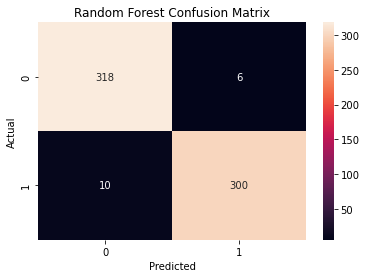

In [12]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Random Forest Confusion Matrix")
plt.show()

# ROC Curve

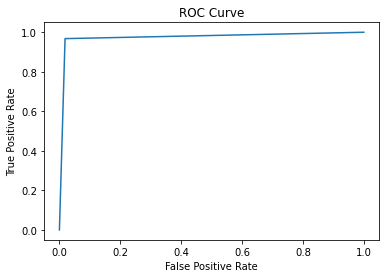

Area Under ROC Curve: 0.9746117084826763


In [13]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)

# Important Features

In [14]:
pd.DataFrame(random_forest.feature_importances_, index=x_train.columns).sort_values(by=0, ascending=False)

,0
meanfun,0.337838
IQR,0.219963
Q25,0.145088
sd,0.095275
sp.ent,0.030723
sfm,0.027437
centroid,0.019272
mode,0.017501
meanfreq,0.014828
median,0.014133


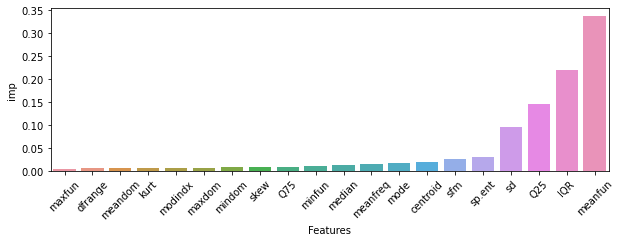

In [15]:
imp = random_forest.feature_importances_
data = pd.DataFrame({"Features": x_train.columns,"imp":imp})
data.set_index("imp")
data = data.sort_values("imp")
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
sb.barplot(x="Features",y="imp",data=data)

# Grid Search CV

In [22]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 5)]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, verbose=2)

In [24]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [25]:
random_forest1 =  RandomForestClassifier(n_estimators = 1000,
                                        min_samples_split = 8,
                                        min_samples_leaf=1,
                                        max_features = 'auto',
                                        max_depth = 90,
                                        bootstrap = True)
start = time.perf_counter()
random_forest1.fit(x_train,y_train)
end = time.perf_counter()
print("Random Forest Classification Score: ",random_forest1.score(x_test,y_test))
predications = random_forest1.predict(x_test)
print ("Score on training dataset :",random_forest1.score(x_train,y_train))
print("Score on testing dataset :",random_forest1.score(x_test, y_test))
# using metrics module for accuracy calculation
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")
print("Time Taken : "+str(end-start))

Random Forest Classification Score:  0.9652996845425867
Score on training dataset : 0.9980268350434096
Score on testing dataset : 0.9652996845425867
Out of total 634 samples 612 samples were predicted correctly
Time Taken : 8.161725700001625


# Recursive Feature Elimination

In [17]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator = random_forest,step=1)
rfe.fit(x_train,y_train)
x_train_selected = rfe.transform(x_train)
x_test_selected = rfe.transform(x_test)

In [18]:
selected_features = pd.DataFrame({'Feature':list(x_train.columns),
                         'Ranking':rfe.ranking_})
selected_features.sort_values(by = 'Ranking')

,Feature,Ranking
0,meanfreq,1
13,minfun,1
12,meanfun,1
11,centroid,1
10,mode,1
8,sp.ent,1
9,sfm,1
5,IQR,1
3,Q25,1
1,sd,1


In [19]:
start = time.perf_counter()
random_forest.fit(x_train_selected,y_train)
end = time.perf_counter()
print("score of Recursive Feature selection :",format(random_forest.score(x_test_selected,y_test)))
print("Time taken : "+str(end-start))
start = time.perf_counter()
random_forest.fit(x_train,y_train)
end = time.perf_counter()
print("score :",format(random_forest.score(x_test,y_test)))
print("Time taken : "+str(end-start))

score of Recursive Feature selection : 0.9700315457413249
Time taken : 0.6579616000001351
score : 0.9747634069400631
Time taken : 0.8854721000000154


# Testing

In [39]:
test = pd.read_csv("Testing.csv")

In [40]:
test.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.210115,0.040807,0.207951,0.189843,0.241688,0.051845,1.976478,8.005091,0.893176,0.132964,0.197086,0.210115,0.132198,0.028021,0.275862,1.459780,0.187500,6.500000,6.312500,0.283416,male
1,0.209754,0.043248,0.211459,0.187445,0.243812,0.056367,1.502917,4.804347,0.903864,0.146604,0.238142,0.209754,0.132550,0.020592,0.271186,1.658594,0.000000,6.890625,6.890625,0.228240,male
2,0.204773,0.040299,0.206353,0.187319,0.228945,0.041626,2.029097,7.157829,0.889091,0.133677,0.204752,0.204773,0.135180,0.051948,0.275862,1.351283,0.187500,6.664062,6.476562,0.295135,male
3,0.209101,0.037820,0.211808,0.189077,0.231439,0.042362,2.140739,7.972400,0.881541,0.115100,0.225756,0.209101,0.125872,0.031250,0.228571,0.472656,0.234375,0.820312,0.585938,0.246061,male
4,0.210325,0.045356,0.212845,0.180331,0.249236,0.068906,1.342613,4.600114,0.912661,0.143528,0.185333,0.210325,0.121172,0.017957,0.275862,1.128534,0.179688,6.414062,6.234375,0.199217,male


In [41]:
test['label'] = [1 if i=='male' else 0 for i in test.label]
test.label.value_counts()

1    40
0    40
Name: label, dtype: int64

In [42]:
x = test.drop(['label'],axis=1)
y = test.label.values

In [43]:
x_test = pd.DataFrame(x) 
y_test = pd.DataFrame(y)

In [44]:
predications = random_forest.predict(x_test)

In [45]:
print('Accuracy Score:   ',end=" ")
print(metrics.accuracy_score(y_test,predications))

Accuracy Score:    0.85
